In [ ]:
#Present your choice of project. 
#Don't just give an ML task, present a specific research question around that task 
#and a biological research question that can be addressed by this. 

In [80]:
!pip install imbalanced-learn
!pip install seaborn

In [81]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTE

In [82]:
# First Dataset
df1 = pd.read_csv("/Users/danae/Downloads/TCGA_dataset/prediction_file_crc.csv")

# Handle "nan" strings
df1.replace('nan', np.nan, inplace=True)

# Check for missing values and display counts
missing_values_df1 = df1.isna().sum()
print(f"Missing Values in First Dataset:\n{missing_values_df1}\n")

# Remove rows with missing values
df1_cleaned = df1.dropna()
df1_cleaned.dtypes
# Display cleaned DataFrame
print("Cleaned First Dataset:")
#df1_cleaned.head()

# Remove rows where MSI status is 'Indeterminate'
msi_status_column = 'msi_status'
df1_filtered = df1_cleaned[df1_cleaned[msi_status_column] != 'Indeterminate']

# Display the filtered DataFrame
print("Filtered First Dataset:")
df1_filtered
# Replace 'nan' strings with actual NaN values
df1.replace('nan', np.nan, inplace=True)
df1_cleaned = df1.dropna()

# Check for missing values in the cleaned dataset
missing_values_df1_cleaned = df1_cleaned.isna().sum()
print(f"Missing Values in Cleaned Dataset:\n{missing_values_df1_cleaned}\n")


Missing Values in First Dataset:
Unnamed: 0                  0
TBL                         0
msi_status                 25
fraction_genome_altered     0
aneuploidy_score            0
TMB                         0
TP53                        0
KRAS                        0
BRAF                        0
APC                         0
TTN                         0
dtype: int64

Cleaned First Dataset:
Filtered First Dataset:
Missing Values in Cleaned Dataset:
Unnamed: 0                 0
TBL                        0
msi_status                 0
fraction_genome_altered    0
aneuploidy_score           0
TMB                        0
TP53                       0
KRAS                       0
BRAF                       0
APC                        0
TTN                        0
dtype: int64



In [83]:
#Second dataset 
df2=pd.read_csv("/Users/danae/Downloads/TCGA_dataset/tcga_rna_count_data_crc.csv")
expression_columns = df2.columns[1:]

# Replace 'nan' strings with actual NaN values
df2.replace('nan', np.nan, inplace=True)

# Replace 0s with NaN in gene expression columns
df2[expression_columns] = df2[expression_columns].replace(0, np.nan)

# Drop rows where any gene expression is NaN
df2_filtered = df2.dropna(subset=expression_columns, how='any')

# Reset the index
df2_filtered.reset_index(drop=True, inplace=True)

# Display the filtered DataFrame
print("Filtered Second Dataset:")
df2_filtered
# Replace 'nan' strings with actual NaN values
df2.replace('nan', np.nan, inplace=True)
df2_filtered = df2.dropna()

# Check for missing values in the cleaned dataset
missing_values_df2_filtered = df2_filtered.isna().sum()
print(f"Missing Values in Cleaned Dataset:\n{missing_values_df2_filtered}\n")


Filtered Second Dataset:
Missing Values in Cleaned Dataset:
Unnamed: 0          0
TCGA-CK-5912-01A    0
TCGA-QG-A5Z2-01A    0
TCGA-AG-3898-01A    0
TCGA-G4-6299-01A    0
                   ..
TCGA-CA-5797-01A    0
TCGA-AA-3860-01A    0
TCGA-CK-4951-01A    0
TCGA-EI-6507-01A    0
TCGA-AA-3858-01A    0
Length: 463, dtype: int64



In [84]:
numeric_columns = df2_filtered.columns[1:]
cpm_df = (df2_filtered[numeric_columns] / df2_filtered[numeric_columns].sum(axis=0)) * 1e6
cutoff = 0.5

# Filter rows where every value is above the cutoff
filtered_cpm_df = cpm_df[cpm_df.apply(lambda row: (row > cutoff).all(), axis=1)]
filtered_cpm_df.reset_index(drop=True, inplace=True)

# Print the resulting DataFrame
print("Filtered CPM DataFrame:")
filtered_cpm_df


Filtered CPM DataFrame:


,TCGA-CK-5912-01A,TCGA-QG-A5Z2-01A,TCGA-AG-3898-01A,TCGA-G4-6299-01A,TCGA-AG-4008-01A,TCGA-NH-A8F8-01A,TCGA-AD-6548-01A,TCGA-AA-A02Y-01A,TCGA-EI-6514-01A,TCGA-AA-3495-01A,...,TCGA-CL-5918-01A,TCGA-AG-A01Y-01A,TCGA-AG-A014-01A,TCGA-AG-A016-01A,TCGA-AA-3846-01A,TCGA-CA-5797-01A,TCGA-AA-3860-01A,TCGA-CK-4951-01A,TCGA-EI-6507-01A,TCGA-AA-3858-01A
0,7509.415217,9010.258689,17971.800947,6545.989673,10568.910547,13748.839360,4950.265220,11153.014739,34704.838635,11552.271047,...,22531.193842,10246.997803,19345.663821,11003.181699,18299.370885,4665.227213,8168.990234,13839.606136,3891.875980,5673.388454
1,4631.990881,9406.632015,11332.842652,1771.327483,7003.184928,14747.245604,6406.946017,18096.742162,17130.061616,13892.258655,...,11737.361869,7188.380993,15019.017702,9684.073988,15883.858767,5222.847962,7454.426157,9825.335192,3874.333519,5350.195467
2,5718.679709,7784.415660,11199.405749,5100.984505,6738.427258,13871.572508,4586.630847,13359.682638,14941.684612,11929.958833,...,16028.988996,4056.608520,12652.841683,8452.830817,9506.817740,4904.395294,5046.321792,7907.168989,2165.871937,4681.244747
3,5734.321059,3839.820719,9907.983689,5680.665620,9091.347120,16473.587266,4114.931885,9089.257680,9882.702480,8383.978455,...,15289.955419,4839.894619,7245.845991,4361.488619,11967.670007,5134.343789,6112.217111,8076.423678,1881.874828,6477.962704
4,3040.184675,4667.173425,5709.240631,6071.214936,5261.030555,5137.710913,9729.429771,6266.562575,5351.487584,5075.854260,...,6163.124883,4979.669142,8145.280697,9762.878565,4374.235550,7182.464507,5819.784691,8475.197374,4875.332091,7086.975816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10513,6.293718,3.380364,4.034258,0.637037,1.833964,2.521033,1.971074,0.988749,2.056891,3.561542,...,1.397788,2.784192,2.218155,1.937350,3.871091,2.416034,2.483403,1.648324,1.845484,2.679564
10514,3.266360,3.107204,1.685196,2.252382,1.667240,2.778281,2.698266,1.318332,1.998677,2.191718,...,2.516018,1.815778,0.757419,2.051312,1.935545,3.401776,1.921123,1.768933,1.347825,2.021425
10515,2.390020,2.424302,2.246928,2.024868,2.056262,2.212335,2.966179,1.336642,1.261301,1.753374,...,1.677345,2.985945,1.190229,1.538484,1.306493,3.343792,2.202263,2.733805,2.384614,2.820593
10516,6.346830,1.365804,2.144795,1.296826,2.556434,1.080443,2.258123,1.354952,2.250938,5.643674,...,3.028540,1.129817,2.380459,1.310561,1.112939,2.145439,1.452556,2.532790,2.467557,1.927405


In [85]:
# Get the indices of filtered rows
filtered_indices = filtered_cpm_df.index

# Use the indices to select corresponding rows from the original DataFrame
filtered_original_values_with_gene = df2_filtered.iloc[filtered_indices]

# Print the resulting DataFrame
print("Filtered Original Values DataFrame with Gene Column:")
filtered_original_values_with_gene


Filtered Original Values DataFrame with Gene Column:


,Unnamed: 0,TCGA-CK-5912-01A,TCGA-QG-A5Z2-01A,TCGA-AG-3898-01A,TCGA-G4-6299-01A,TCGA-AG-4008-01A,TCGA-NH-A8F8-01A,TCGA-AD-6548-01A,TCGA-AA-A02Y-01A,TCGA-EI-6514-01A,...,TCGA-CL-5918-01A,TCGA-AG-A01Y-01A,TCGA-AG-A014-01A,TCGA-AG-A016-01A,TCGA-AA-3846-01A,TCGA-CA-5797-01A,TCGA-AA-3860-01A,TCGA-CK-4951-01A,TCGA-EI-6507-01A,TCGA-AA-3858-01A
0,ND4,282779.0,527763.0,351929.0,287719.0,190175.0,534458.0,258680.0,609116.0,1788482.0,...,967151.0,253949.0,357582.0,193103.0,378175.0,241368.0,174340.0,344243.0,187689.0,120685.0
1,COX1,174425.0,550980.0,221923.0,77856.0,126014.0,573269.0,334800.0,988344.0,882782.0,...,503826.0,178148.0,277609.0,169953.0,328256.0,270218.0,159090.0,244393.0,186843.0,113810.0
2,COX2,215346.0,455961.0,219310.0,224206.0,121250.0,539229.0,239678.0,729632.0,770006.0,...,688044.0,100534.0,233873.0,148345.0,196468.0,253742.0,107697.0,196681.0,104451.0,99580.0
3,COX3,215935.0,224912.0,194021.0,249685.0,163588.0,640377.0,215029.0,496405.0,509296.0,...,656321.0,119946.0,133931.0,76543.0,247324.0,265639.0,130445.0,200891.0,90755.0,137800.0
4,ACTB,114483.0,273373.0,111800.0,266851.0,94666.0,199718.0,508419.0,342245.0,275784.0,...,264552.0,123410.0,150556.0,171336.0,90398.0,371604.0,124204.0,210810.0,235117.0,150755.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10706,PPAN,167.0,709.0,219.0,556.0,117.0,490.0,562.0,573.0,327.0,...,553.0,378.0,331.0,171.0,100.0,252.0,165.0,151.0,397.0,404.0
10707,REL,579.0,976.0,235.0,392.0,92.0,235.0,433.0,180.0,545.0,...,338.0,213.0,73.0,79.0,202.0,265.0,109.0,99.0,622.0,127.0
10708,ZC3H6,711.0,639.0,59.0,566.0,195.0,178.0,546.0,371.0,885.0,...,580.0,90.0,154.0,95.0,220.0,541.0,117.0,104.0,500.0,97.0
10709,TTN,346.0,1099.0,184.0,228.0,64.0,356.0,91.0,105.0,37.0,...,17.0,316.0,87.0,46.0,157.0,208.0,82.0,79.0,423.0,11.0


In [86]:
# Transpose the second dataframe
df2_transposed = filtered_original_values_with_gene.T
df2_transposed
# Reset the index and use the first row as column names
df2_transposed.reset_index(inplace=True)
df2_transposed.columns = df2_transposed.iloc[0]

# Drop the first row (it's now redundant)
df2_transposed = df2_transposed.iloc[1:]

# Merge the two dataframes based on index with specified suffixes
merged_df = df1_filtered.merge(df2_transposed, left_on='Unnamed: 0', right_on='Unnamed: 0', suffixes=('', '_df2'))

# Reset the index of the merged dataframe
merged_df.reset_index(drop=True, inplace=True)
merged_df
#merged_df.to_csv(path_or_buf="/Users/danae/Downloads/TCGA_dataset/merged.csv")

,Unnamed: 0,TBL,msi_status,fraction_genome_altered,aneuploidy_score,TMB,TP53,KRAS,BRAF,APC,...,BOLA1,SLC36A4,ELFN1-AS1,KTI12,KRT8P3,PPAN,REL,ZC3H6,TTN_df2,ZNF767P
0,TCGA-3L-AA1B-01A,19,MSS,0.114119,6,118,WT,WT,SNV,SNV,...,324.0,661.0,464.0,355.0,634.0,587.0,470.0,625.0,717.0,904.0
1,TCGA-4N-A93T-01A,38,MSS,0.311631,12,81,SNV,SNV,WT,WT,...,585.0,386.0,179.0,271.0,133.0,661.0,205.0,460.0,303.0,949.0
2,TCGA-5M-AAT4-01A,87,MSS,0.422921,13,159,SNV,SNV,WT,SNV,...,592.0,358.0,1264.0,377.0,258.0,781.0,433.0,668.0,657.0,662.0
3,TCGA-5M-AAT5-01A,28,MSI-L,0.357734,12,72,SNV,WT,WT,SNV,...,391.0,240.0,482.0,490.0,442.0,705.0,255.0,116.0,659.0,577.0
4,TCGA-5M-AAT6-01A,3,MSI-H,0.049432,2,1828,WT,SNV,WT,SNV,...,286.0,312.0,160.0,370.0,327.0,299.0,215.0,182.0,204.0,465.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,TCGA-QL-A97D-01A,104,MSS,0.309643,9,209,SNV,SNV,WT,SNV,...,236.0,78.0,99.0,385.0,1126.0,469.0,590.0,366.0,85.0,555.0
431,TCGA-RU-A8FL-01A,105,MSS,0.270808,10,115,SNV,WT,WT,SNV,...,435.0,294.0,99.0,648.0,129.0,672.0,184.0,517.0,358.0,284.0
432,TCGA-SS-A7HO-01A,82,MSS,0.408573,15,143,SNV,SNV,WT,SNV,...,168.0,144.0,605.0,535.0,1081.0,354.0,418.0,228.0,472.0,941.0
433,TCGA-T9-A92H-01A,115,MSS,0.178141,6,150,SNV,WT,WT,WT,...,375.0,496.0,807.0,439.0,561.0,763.0,480.0,433.0,27.0,510.0


<Axes: xlabel='msi_status'>

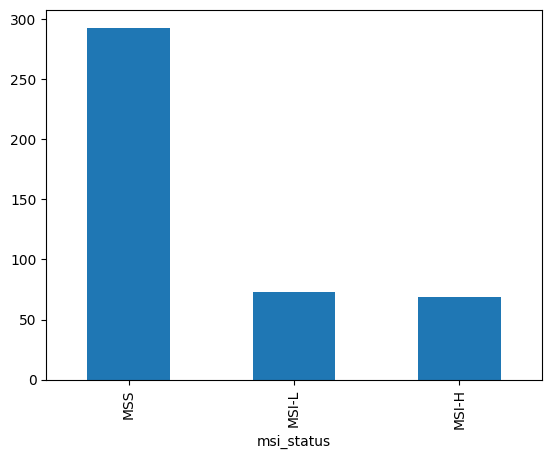

In [87]:
merged_df['msi_status'].value_counts().plot(kind = 'bar')

In [93]:
# Drop the 'msi_status' column as it is already encoded
# Drop the 'msi_status' column as it is already encoded
X = merged_df.drop(['Unnamed: 0', 'msi_status'], axis=1)

# Encode the target variable
label_encoder = LabelEncoder()
merged_df['msi_status_encoded'] = label_encoder.fit_transform(merged_df['msi_status'])
y = merged_df['msi_status_encoded']

# Identify categorical columns
categorical_columns = ['TP53', 'KRAS', 'BRAF', 'APC', 'TTN']  

# Use OneHotEncoder to encode categorical variables
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_columns]))
X_encoded.columns = encoder.get_feature_names_out(categorical_columns)

# Drop the original categorical columns and concatenate the encoded ones
X = pd.concat([X.drop(categorical_columns, axis=1), X_encoded], axis=1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print("Classification Report:\n", classification_report_str)

/Users/danae/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy: 0.79
Confusion Matrix:
[[10  0  3]
 [ 0  0 14]
 [ 1  0 59]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.77      0.83        13
           1       0.00      0.00      0.00        14
           2       0.78      0.98      0.87        60

    accuracy                           0.79        87
   macro avg       0.56      0.58      0.57        87
weighted avg       0.67      0.79      0.72        87



/Users/danae/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danae/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danae/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [95]:
# Oversample the training set using SMOTE
oversampler = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Train a Random Forest Classifier on the resampled data
rf_classifier_resampled = RandomForestClassifier(random_state=42)
rf_classifier_resampled.fit(X_train_resampled, y_train_resampled)

# Predict on the original test set
y_pred_resampled = rf_classifier_resampled.predict(X_test)

# Evaluate the model performance on resampled data
accuracy_resampled = accuracy_score(y_test, y_pred_resampled)
conf_matrix_resampled = confusion_matrix(y_test, y_pred_resampled)
classification_report_resampled = classification_report(y_test, y_pred_resampled)

print(f"Accuracy on Resampled Data: {accuracy_resampled:.2f}")
print(f"Confusion Matrix on Resampled Data:\n{conf_matrix_resampled}")
print("Classification Report on Resampled Data:\n", classification_report_resampled)

Accuracy on Resampled Data: 0.78
Confusion Matrix on Resampled Data:
[[11  0  2]
 [ 0  2 12]
 [ 1  4 55]]
Classification Report on Resampled Data:
               precision    recall  f1-score   support

           0       0.92      0.85      0.88        13
           1       0.33      0.14      0.20        14
           2       0.80      0.92      0.85        60

    accuracy                           0.78        87
   macro avg       0.68      0.64      0.64        87
weighted avg       0.74      0.78      0.75        87



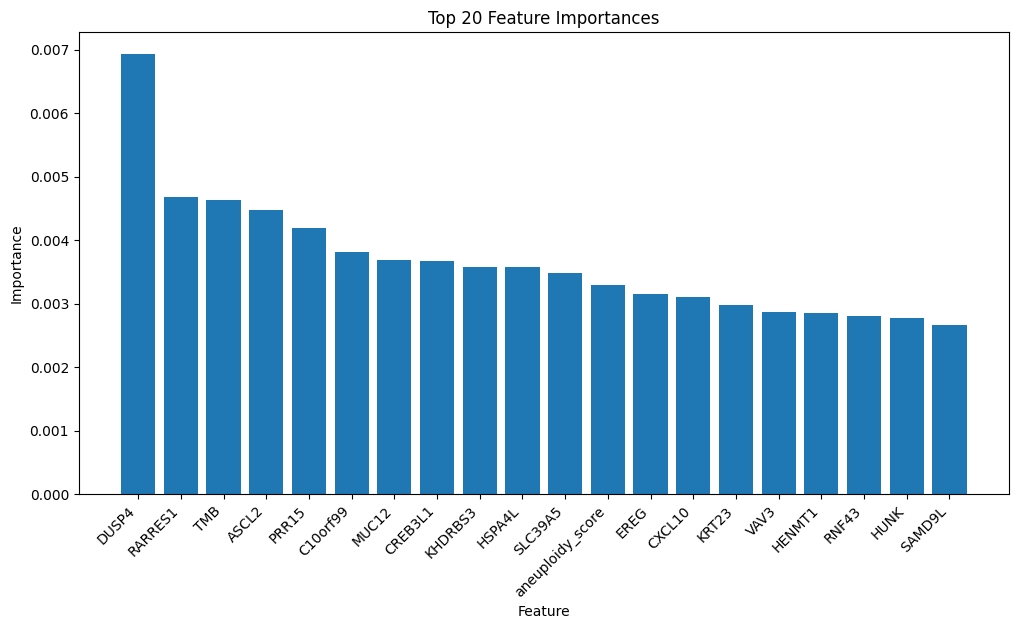

Accuracy with Top 500 Features: 0.82
Confusion Matrix with Top 500 Features:
[[12  0  1]
 [ 0  0 14]
 [ 1  0 59]]
Classification Report with Top 500 Features:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.00      0.00      0.00        14
           2       0.80      0.98      0.88        60

    accuracy                           0.82        87
   macro avg       0.57      0.64      0.60        87
weighted avg       0.69      0.82      0.75        87



/Users/danae/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danae/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danae/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [96]:
import matplotlib.pyplot as plt

feature_importance = rf_classifier.feature_importances_

# Sort features based on importance
sorted_indices = np.argsort(feature_importance)[::-1]

# Select the top 500 features
top_500_features = X.columns[sorted_indices][:500]

# Plot the top 20 feature importances
plt.figure(figsize=(12, 6))
plt.bar(range(20), feature_importance[sorted_indices][:20], align='center')
plt.xticks(range(20), X.columns[sorted_indices][:20], rotation=45, ha='right')
plt.title('Top 20 Feature Importances')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

# Select only the top 500 features
X_top_500 = X[top_500_features]

# Split the data with the new set of features
X_train_top_500, X_test_top_500, y_train_top_500, y_test_top_500 = train_test_split(
    X_top_500, y, test_size=0.2, random_state=42
)

# Train a new Random Forest Classifier with the top 500 features
rf_classifier_top_500 = RandomForestClassifier(random_state=42)
rf_classifier_top_500.fit(X_train_top_500, y_train_top_500)

# Predict on the test set with the top 500 features
y_pred_top_500 = rf_classifier_top_500.predict(X_test_top_500)

# Evaluate the performance of the model with top 500 features
accuracy_top_500 = accuracy_score(y_test_top_500, y_pred_top_500)
conf_matrix_top_500 = confusion_matrix(y_test_top_500, y_pred_top_500)
classification_report_top_500 = classification_report(y_test_top_500, y_pred_top_500)

print(f"Accuracy with Top 500 Features: {accuracy_top_500:.2f}")
print(f"Confusion Matrix with Top 500 Features:\n{conf_matrix_top_500}")
print("Classification Report with Top 500 Features:\n", classification_report_top_500)


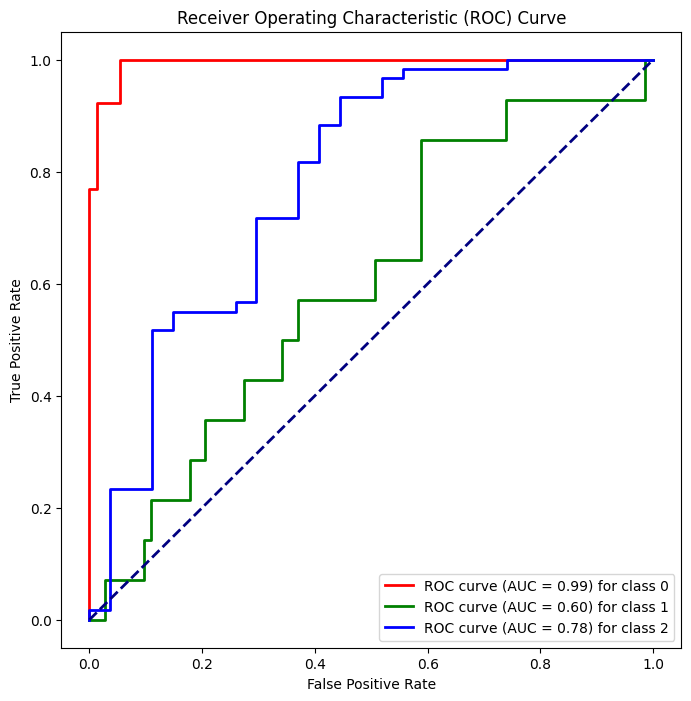

In [97]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# ... (Previous code)

# Plot ROC curve
y_test_bin = label_binarize(y_test_top_500, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Use OneVsRestClassifier for multi-class ROC curve
classifier = OneVsRestClassifier(rf_classifier_top_500)
y_score = classifier.fit(X_train_top_500, y_train_top_500).predict_proba(X_test_top_500)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 8))
colors = ['red', 'green', 'blue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (AUC = {roc_auc[i]:.2f}) for class {i}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


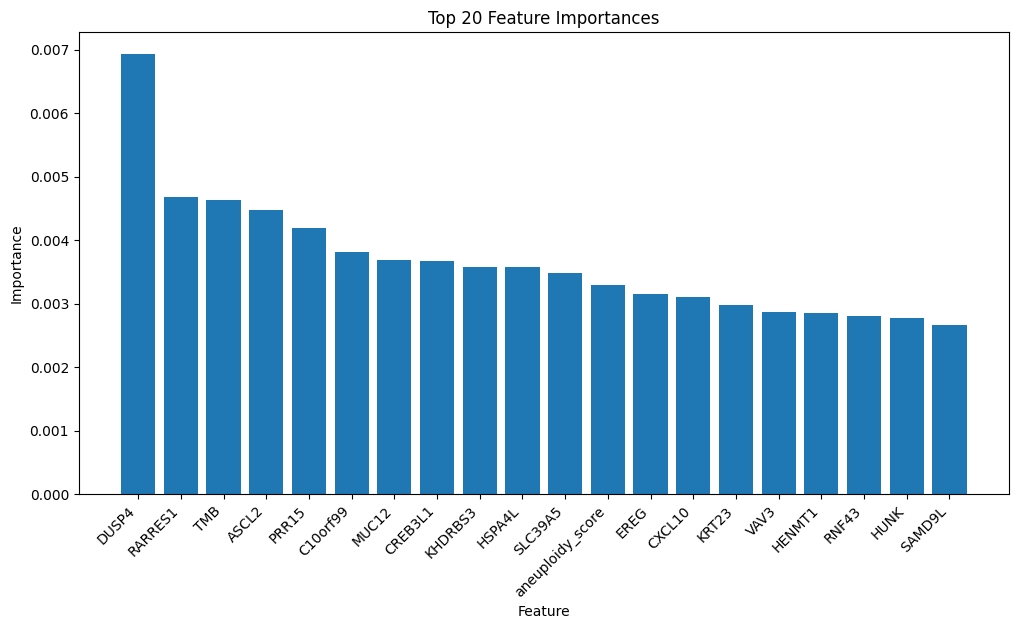

Accuracy with Top 500 Features: 0.82
Confusion Matrix with Top 500 Features:
[[12  0  1]
 [ 0  0 14]
 [ 1  0 59]]
Classification Report with Top 500 Features:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.00      0.00      0.00        14
           2       0.80      0.98      0.88        60

    accuracy                           0.82        87
   macro avg       0.57      0.64      0.60        87
weighted avg       0.69      0.82      0.75        87



/Users/danae/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danae/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danae/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [98]:
# Select the top 500 features
top_500_features = X.columns[sorted_indices][:500]

# Plot the top 20 feature importances
plt.figure(figsize=(12, 6))
plt.bar(range(20), feature_importance[sorted_indices][:20], align='center')
plt.xticks(range(20), X.columns[sorted_indices][:20], rotation=45, ha='right')
plt.title('Top 20 Feature Importances')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

# Select only the top 500 features
X_top_500 = X[top_500_features]

# Split the data with the new set of features
X_train_top_500, X_test_top_500, y_train_top_500, y_test_top_500 = train_test_split(
    X_top_500, y, test_size=0.2, random_state=42
)

# Train a new Random Forest Classifier with the top 500 features
rf_classifier_top_500 = RandomForestClassifier(random_state=42)
rf_classifier_top_500.fit(X_train_top_500, y_train_top_500)

# Predict on the test set with the top 500 features
y_pred_top_500 = rf_classifier_top_500.predict(X_test_top_500)

# Evaluate the performance of the model with top 500 features
accuracy_top_500 = accuracy_score(y_test_top_500, y_pred_top_500)
conf_matrix_top_500 = confusion_matrix(y_test_top_500, y_pred_top_500)
classification_report_top_500 = classification_report(y_test_top_500, y_pred_top_500)

print(f"Accuracy with Top 500 Features: {accuracy_top_500:.2f}")
print(f"Confusion Matrix with Top 500 Features:\n{conf_matrix_top_500}")
print("Classification Report with Top 500 Features:\n", classification_report_top_500)


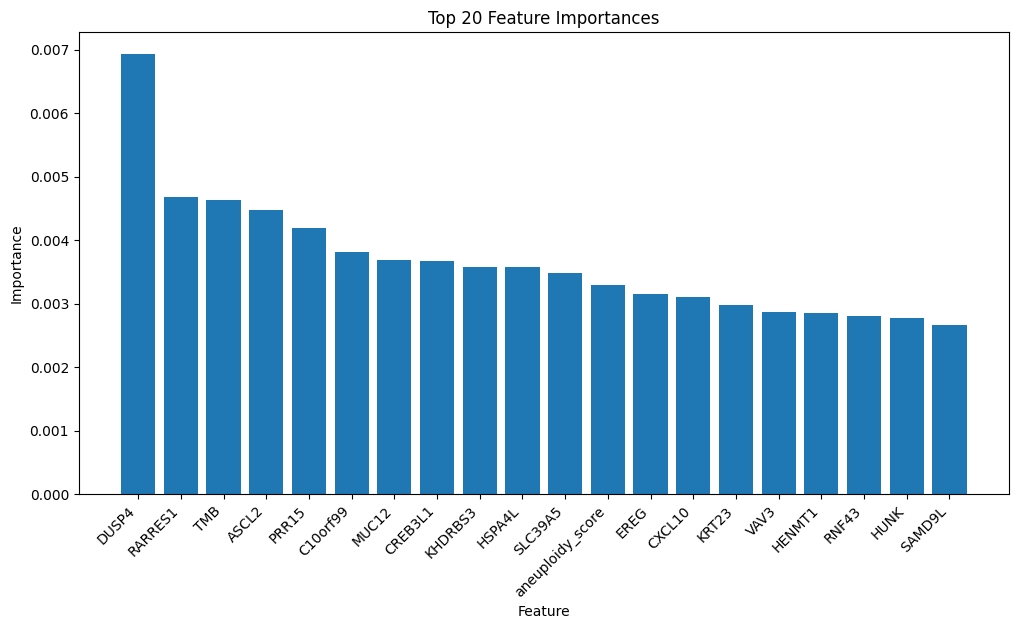

/Users/danae/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danae/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danae/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy with Top 500 Features: 0.82
Confusion Matrix with Top 500 Features:
[[12  0  1]
 [ 0  0 14]
 [ 1  0 59]]
Classification Report with Top 500 Features:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.00      0.00      0.00        14
           2       0.80      0.98      0.88        60

    accuracy                           0.82        87
   macro avg       0.57      0.64      0.60        87
weighted avg       0.69      0.82      0.75        87



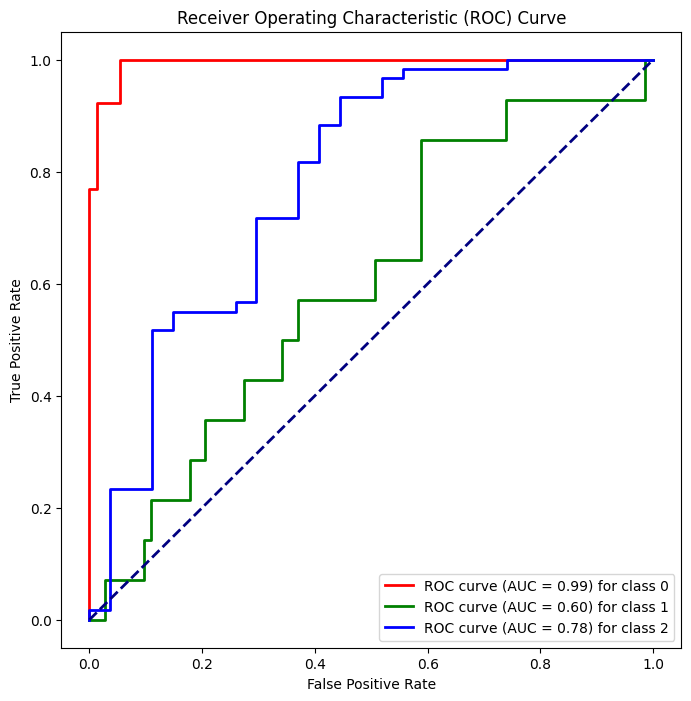

In [99]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# ... (Previous code)

# Plot the top 20 feature importances
plt.figure(figsize=(12, 6))
plt.bar(range(20), feature_importance[sorted_indices][:20], align='center')
plt.xticks(range(20), X.columns[sorted_indices][:20], rotation=45, ha='right')
plt.title('Top 20 Feature Importances')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

# Select only the top 500 features
X_top_500 = X[top_500_features]

# Split the data with the new set of features
X_train_top_500, X_test_top_500, y_train_top_500, y_test_top_500 = train_test_split(
    X_top_500, y, test_size=0.2, random_state=42
)

# Train a new Random Forest Classifier with the top 500 features
rf_classifier_top_500 = RandomForestClassifier(random_state=42)
rf_classifier_top_500.fit(X_train_top_500, y_train_top_500)

# Predict on the test set with the top 500 features
y_pred_top_500 = rf_classifier_top_500.predict(X_test_top_500)

# Evaluate the performance of the model with top 500 features
accuracy_top_500 = accuracy_score(y_test_top_500, y_pred_top_500)
conf_matrix_top_500 = confusion_matrix(y_test_top_500, y_pred_top_500)
classification_report_top_500 = classification_report(y_test_top_500, y_pred_top_500)

print(f"Accuracy with Top 500 Features: {accuracy_top_500:.2f}")
print(f"Confusion Matrix with Top 500 Features:\n{conf_matrix_top_500}")
print("Classification Report with Top 500 Features:\n", classification_report_top_500)

# Plot ROC curve
y_test_bin = label_binarize(y_test_top_500, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Use OneVsRestClassifier for multi-class ROC curve
classifier = OneVsRestClassifier(rf_classifier_top_500)
y_score = classifier.fit(X_train_top_500, y_train_top_500).predict_proba(X_test_top_500)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 8))
colors = ['red', 'green', 'blue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (AUC = {roc_auc[i]:.2f}) for class {i}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



In [100]:
# Select the top 500 features
top_500_features = X.columns[sorted_indices][:500]

# Filter the columns in df2_filtered that correspond to the top 500 features
matching_columns = ['Unnamed: 0'] + [col for col in merged_df.columns if col in top_500_features]
df2_top_500 = merged_df[matching_columns].copy()
df2_top_500
# Transpose the DataFrame for better alignment with your merged DataFrame
df2_top_500_transposed = df2_top_500.T
df2_top_500



,Unnamed: 0,fraction_genome_altered,aneuploidy_score,TMB,COX3,CD74,P4HB,BSG,TFF3,GPX2,...,ZC4H2,NDUFV2,CLSPN,WFDC1,IKZF3,XAF1,CCNJL,ZNF529,TLR3,KRT8P3
0,TCGA-3L-AA1B-01A,0.114119,6,118,381241.0,29347.0,45961.0,38595.0,29635.0,27330.0,...,741.0,268.0,250.0,634.0,545.0,426.0,475.0,758.0,362.0,634.0
1,TCGA-4N-A93T-01A,0.311631,12,81,973104.0,22498.0,58730.0,31757.0,29339.0,39268.0,...,444.0,456.0,46.0,160.0,172.0,341.0,168.0,976.0,112.0,133.0
2,TCGA-5M-AAT4-01A,0.422921,13,159,330426.0,9932.0,43898.0,32702.0,30113.0,39144.0,...,651.0,498.0,439.0,357.0,66.0,166.0,157.0,236.0,61.0,258.0
3,TCGA-5M-AAT5-01A,0.357734,12,72,266300.0,17317.0,45576.0,35069.0,10808.0,27685.0,...,385.0,527.0,266.0,512.0,74.0,78.0,164.0,499.0,316.0,442.0
4,TCGA-5M-AAT6-01A,0.049432,2,1828,235405.0,97158.0,43092.0,31616.0,165.0,18628.0,...,95.0,428.0,548.0,74.0,729.0,932.0,84.0,398.0,219.0,327.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,TCGA-QL-A97D-01A,0.309643,9,209,520057.0,55344.0,24823.0,38840.0,4359.0,41901.0,...,287.0,362.0,529.0,171.0,646.0,438.0,90.0,980.0,277.0,1126.0
431,TCGA-RU-A8FL-01A,0.270808,10,115,479789.0,2753.0,52782.0,36526.0,8872.0,33132.0,...,295.0,408.0,386.0,69.0,65.0,75.0,126.0,488.0,43.0,129.0
432,TCGA-SS-A7HO-01A,0.408573,15,143,228470.0,10667.0,47893.0,25335.0,3546.0,36251.0,...,365.0,356.0,522.0,152.0,48.0,58.0,305.0,347.0,51.0,1081.0
433,TCGA-T9-A92H-01A,0.178141,6,150,562763.0,60578.0,47322.0,54655.0,41074.0,40923.0,...,840.0,529.0,457.0,191.0,175.0,193.0,209.0,162.0,546.0,561.0
